Basic workflow
 - read the fashion MNIST data and create an X(image) and Y(label) batch
 - create a summary writer
 - create the embedding Tensor from X
 - configure the projector
 - run the TF session and create a model check-point
 - create the sprite image
 - create the metadata(label) file


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
test_data = np.array(pd.read_csv(r'data/fashion-mnist_test.csv'), dtype='float32')

embed_count = 1600 # number of images in embedding
x_test = test_data[:embed_count, 1:]/255
y_test = test_data[:embed_count, 0]

logdir = r'/Users/weenit/python/deep_learning_keras_mark_jay/logdir'

In [11]:
summary_writer = tf.summary.FileWriter(logdir)

embedding_var = tf.Variable(x_test, name = 'fmnist_embedding')

config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name

embedding.metadata_path = os.path.join(logdir, 'metadata.tsv')
embedding.sprite.image_path = os.path.join(logdir, 'sprite.png')
embedding.sprite.single_image_dim.extend([20,20])

projector.visualize_embeddings(summary_writer, config)

In [13]:
'''
    run tensorflow session
'''

with tf.Session() as sesh:
    sesh.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.save(sesh, os.path.join(logdir,'model.ckpt'))

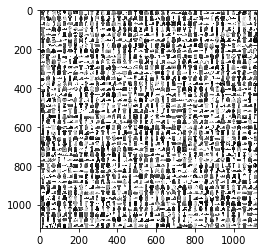

In [17]:
'''
    build sprite file
'''
rows = 28
cols = 28

label = ['t-shirt','trouser','pullover','dress','coat',
         'sandal','shirt','sneaker','bag','ankel_boot'
        ]
sprite_dim = int(np.sqrt(x_test.shape[0]))

sprite_image = np.ones((cols * sprite_dim, rows * sprite_dim))

labels = []

index = 0
for i in range(sprite_dim):
    for j in range(sprite_dim):
        labels.append(label[int(y_test[index])])
        
        sprite_image[
            i * cols: (i + 1) * cols,
            j * rows: (j + 1) * rows
        ] = x_test[index].reshape(28,28) * -1 + 1
        
        index +=1
        
with open(embedding.metadata_path, 'w') as meta:
    meta.write('Index\tLabel\n')
    for index, label in enumerate(labels):
        meta.write('{}\t{}\n'.format(index,label))
        
plt.imsave(embedding.sprite.image_path, sprite_image, cmap='gray')
plt.imshow(sprite_image, cmap='gray')
plt.show()